<a href="https://colab.research.google.com/github/majesticio/Box_Office_Predictions/blob/master/Box_Office_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Box Office Prediction
*Using Decision Tree Regression*

---
by **Gabriel Fosse**

##Problem Definition
Using the decision tree method of regression, we will endeavor to predict how well a movie will perform in the box office, given it's feature's characteristics.

##Import Libaries

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
from sklearn import preprocessing
from sklearn.linear_model import Ridge
import statsmodels.api as sm
import json
import re
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from IPython.display import display
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import display
from sklearn import tree
import plaidml.keras
import plaidml.keras
import os


##Data Collection
*Data provided by TMDb, 'The Movie Database'*

In [ ]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

In [ ]:
# google drive hosted link
# paste_csv_path_here = '/content/drive/My Drive/Colab Notebooks/csv files/Project_3_Movie_Data.csv'

In [ ]:
#Local runtime link
paste_csv_path_here = '/home/samus/Jupyter-Notebooks/csv_files/Project_3_Movie_Data.csv'

In [ ]:
movie_train = pd.read_csv(paste_csv_path_here)

##Data Cleaning

In [ ]:
movie_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4322 non-null   int64  
 1   genres                4322 non-null   object 
 2   homepage              1553 non-null   object 
 3   id                    4322 non-null   int64  
 4   keywords              4322 non-null   object 
 5   original_language     4322 non-null   object 
 6   original_title        4322 non-null   object 
 7   overview              4319 non-null   object 
 8   popularity            4322 non-null   float64
 9   production_companies  4322 non-null   object 
 10  production_countries  4322 non-null   object 
 11  release_date          4322 non-null   object 
 12  runtime               4320 non-null   float64
 13  spoken_languages      4322 non-null   object 
 14  status                4322 non-null   object 
 15  tagline              

We can see we have 22 features and 4320 rows (movies)

In [ ]:
type(movie_train)

pandas.core.frame.DataFrame

In [ ]:
movie_train.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,title.1,cast,crew,revenue
0,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,44770,"[{""id"": 10183, ""name"": ""independent film""}]",en,The Exploding Girl,"On a summer break from college, Ivy, a young e...",0.611081,[],[],2009-04-22,80.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Exploding Girl,6.4,15,44770,The Exploding Girl,"[{""cast_id"": 3, ""character"": ""Ivy"", ""credit_id...","[{""credit_id"": ""52fe469bc3a36847f8108245"", ""de...",0
1,1500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam...",http://www.dhentertainment.com/projects/1.my-n...,1961,"[{""id"": 9755, ""name"": ""parody""}, {""id"": 33465,...",en,My Name Is Bruce,B Movie Legend Bruce Campbell is mistaken for ...,7.559100,"[{""name"": ""Dark Horse Entertainment"", ""id"": 55...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-10-01,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fearless! Unstoppable! Ready For His Close-Up!,My Name Is Bruce,5.9,107,1961,My Name Is Bruce,"[{""cast_id"": 2, ""character"": ""Bruce Campbell"",...","[{""credit_id"": ""52fe4326c3a36847f803e1bf"", ""de...",173066
2,25000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://whatjusthappenedfilm.com/,8944,"[{""id"": 887, ""name"": ""film producer""}, {""id"": ...",en,What Just Happened,During the course of an ordinary week in Holly...,8.316530,"[{""name"": ""2929 Productions"", ""id"": 846}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-10-17,104.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Admit nothing.,What Just Happened,5.2,127,8944,What Just Happened,"[{""cast_id"": 2, ""character"": ""Himself"", ""credi...","[{""credit_id"": ""56fa7d06c3a3681937002bd9"", ""de...",6673422
3,62000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 878, ""na...",NaN,33468,"[{""id"": 741, ""name"": ""transplantation""}, {""id""...",en,The Brain That Wouldn't Die,Dr. Bill Cortner (Jason Evers) and his fiancée...,2.407048,"[{""name"": ""Rex Carlton Productions"", ""id"": 123...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1962-02-25,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Alive... without a body... fed by an unspeakab...,The Brain That Wouldn't Die,4.4,32,33468,The Brain That Wouldn't Die,"[{""cast_id"": 5, ""character"": ""Dr. Bill Cortner...","[{""credit_id"": ""52fe451b9251416c91027baf"", ""de...",0
4,140000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",NaN,95,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Armageddon,When an asteroid threatens to collide with Ear...,58.485967,"[{""name"": ""Jerry Bruckheimer Films"", ""id"": 130...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-07-01,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Earth's Darkest Day Will Be Man's Finest Hour,Armageddon,6.4,2482,95,Armageddon,"[{""cast_id"": 7, ""character"": ""Harry S. Stamper...","[{""credit_id"": ""5491a0a4c3a368466b001ce7"", ""de...",553799566


###Dropping Columns
*Removing features that are deemed unlikely to improve our model*

In [ ]:
movie_db = movie_train.copy()

In [ ]:
type(movie_db)

pandas.core.frame.DataFrame

In [ ]:
movie_db.drop('homepage', axis = 1, inplace= True)

In [ ]:
movie_db.drop('id', axis = 1, inplace= True)

In [ ]:
movie_db.drop('keywords', axis = 1, inplace= True)

In [ ]:
movie_db.drop('original_title', axis = 1, inplace= True)

In [ ]:
movie_db.drop('overview', axis = 1, inplace= True)

In [ ]:
movie_db.drop('spoken_languages', axis = 1, inplace= True)

In [ ]:
movie_db.drop('status', axis = 1, inplace= True)

In [ ]:
movie_db.drop('tagline', axis = 1, inplace= True)

In [ ]:
movie_db.drop('movie_id', axis = 1, inplace= True)

In [ ]:
movie_db.drop('title.1', axis = 1, inplace= True)

In [ ]:
movie_db.drop('vote_count', axis = 1, inplace= True)

***Going to try dropping popularity for now***

*A new movie's popularity would not be known*

In [ ]:
movie_db.drop('popularity', axis = 1, inplace= True)

***Drop null values***

In [ ]:
movie_db = movie_db.dropna()

In [ ]:
movie_db.shape

(4320, 12)

***Looks like it dropped one row. Re-index to make sure rows line up***

In [ ]:
movie_db = movie_db.reset_index(drop=True)

***Did it work?***

In [ ]:
movie_db.shape

(4320, 12)

In [ ]:
movie_db

,budget,genres,original_language,production_companies,production_countries,release_date,runtime,title,vote_average,cast,crew,revenue
0,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",en,[],[],2009-04-22,80.0,The Exploding Girl,6.4,"[{""cast_id"": 3, ""character"": ""Ivy"", ""credit_id...","[{""credit_id"": ""52fe469bc3a36847f8108245"", ""de...",0
1,1500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam...",en,"[{""name"": ""Dark Horse Entertainment"", ""id"": 55...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-10-01,86.0,My Name Is Bruce,5.9,"[{""cast_id"": 2, ""character"": ""Bruce Campbell"",...","[{""credit_id"": ""52fe4326c3a36847f803e1bf"", ""de...",173066
2,25000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,"[{""name"": ""2929 Productions"", ""id"": 846}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-10-17,104.0,What Just Happened,5.2,"[{""cast_id"": 2, ""character"": ""Himself"", ""credi...","[{""credit_id"": ""56fa7d06c3a3681937002bd9"", ""de...",6673422
3,62000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 878, ""na...",en,"[{""name"": ""Rex Carlton Productions"", ""id"": 123...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1962-02-25,82.0,The Brain That Wouldn't Die,4.4,"[{""cast_id"": 5, ""character"": ""Dr. Bill Cortner...","[{""credit_id"": ""52fe451b9251416c91027baf"", ""de...",0
4,140000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",en,"[{""name"": ""Jerry Bruckheimer Films"", ""id"": 130...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-07-01,151.0,Armageddon,6.4,"[{""cast_id"": 7, ""character"": ""Harry S. Stamper...","[{""credit_id"": ""5491a0a4c3a368466b001ce7"", ""de...",553799566
...,...,...,...,...,...,...,...,...,...,...,...,...
4315,0,"[{""id"": 18, ""name"": ""Drama""}]",en,[],[],2014-04-16,90.0,A Fine Step,4.1,"[{""cast_id"": 2, ""character"": ""Cal"", ""credit_id...","[{""credit_id"": ""56a9eac7c3a36872cd004ab5"", ""de...",0
4316,80000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",en,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2002-03-04,96.0,The Time Machine,5.8,"[{""cast_id"": 17, ""character"": ""Alexander Hartd...","[{""credit_id"": ""52fe4339c3a36847f8043c15"", ""de...",123729176
4317,10000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,"[{""name"": ""Echo Lake Productions"", ""id"": 2147}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-09-13,96.0,The Joneses,6.1,"[{""cast_id"": 4, ""character"": ""Steve Jones"", ""c...","[{""credit_id"": ""52fe45cdc3a36847f80db247"", ""de...",7022728
4318,4000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 80, ""nam...",en,"[{""name"": ""Echo Lake Productions"", ""id"": 2147}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-02-09,90.0,You Kill Me,6.2,"[{""cast_id"": 2, ""character"": ""Frank Falenczyk""...","[{""credit_id"": ""52fe4494c3a36847f809e0c7"", ""de...",2426851


Looks like it worked.

###Dropping Rows
*Create a new DataFrame with above average revenue movies*

In [ ]:
movie_db.shape

(4320, 12)

####Boolean tests

*I used these lines of code to compare movies that were above/below average revenue*

In [ ]:
#movie_db = movie_db[movie_db['revenue'] > 81689801].copy()
#movie_db = movie_db[movie_db['revenue'] <= 81689801].copy()


In [ ]:
movie_db.shape

(4320, 12)

***Create variables to store the titles and revenue for later***

In [ ]:
revenue = movie_db['revenue'].copy()

In [ ]:
revenue.mean()

81689800.72962964

In [ ]:
titles = movie_db['title'].copy()

In [ ]:
type(revenue)


pandas.core.series.Series

###Extracting info from 'json' fields
*Take desired values and populate new fields in new feature columns.*

####Director Ranking

*Let's create a column for ranked directors, extracted from cast. First we will make a dictionary of directors with their ranks*

In [ ]:
crews = movie_db['crew'].tolist()

director_ranks = {}
for crew in crews:
  list_dict = json.loads(crew)
  names = [element['name'] for element in list_dict if element['job'] == 'Director']
  for name in names:
    if name in director_ranks.keys():
      director_ranks[name] += 1
    else: director_ranks[name] = 1

In [ ]:
director_ranks

{'Bradley Rust Gray': 1,
 'Bruce Campbell': 1,
 'Barry Levinson': 11,
 'Joseph Green': 1,
 'Michael Bay': 12,
 'Gary Shore': 1,
 'Stanley Kubrick': 6,
 'Jon M. Chu': 5,
 'Alex Kendrick': 2,
 'Kief Davidson': 1,
 'Daniel Junge': 1,
 'Colin Strause': 2,
 'Greg Strause': 2,
 'Jacques Perrin': 2,
 'Pece Dingo': 1,
 'Dan Curtis': 1,
 'Rob Hedden': 1,
 'Steve Carr': 5,
 'Matt Cimber': 1,
 'Anne Fletcher': 4,
 'Stuart Gillard': 2,
 'Sadyk Sher-Niyaz': 1,
 'Michael Apted': 6,
 'Monte Hellman': 1,
 'John Stephenson': 1,
 'Andrew Niccol': 5,
 'Angelo Pizzo': 1,
 'Miloš Forman': 3,
 'Bruce Paltrow': 1,
 'Douglas Aarniokoski': 2,
 'Terence Young': 4,
 'Michel Gondry': 3,
 'Colin Higgins': 1,
 'Guillermo del Toro': 4,
 'Wes Craven': 10,
 'Francis Lawrence': 5,
 'Susanna White': 2,
 'Sajid Khan': 1,
 'Patricia Riggen': 3,
 'Adam Shankman': 7,
 'Richard Lester': 5,
 'Jesse Peretz': 2,
 'Peter Care': 1,
 'Gilles Paquet-Brenner': 1,
 'Mike Binder': 3,
 'Jonas Åkerlund': 2,
 'Charles Ferguson': 3,
 'Eri

That'll do. *Now we sort for highest ranked director per film*

In [ ]:
#json_list will be our input from crew field in df
# ranking_dict will be the dictionary of crew ranks
def director_ranking(json_list, ranking_dict):
  list_dict = json.loads(json_list)
  names = [element['name'] for element in list_dict if element['job'] == 'Director']
  rankings = [ranking_dict[name] for name in names]
  rankings.sort()
  if len(rankings) > 0: rank = rankings[-1]
  else: rank = 0
  return rank

***Create a new column filled with director ranks as => director_ranks***

In [ ]:
movie_db['director_ranks'] = movie_db['crew'].apply(lambda x: director_ranking(x, director_ranks))

In [ ]:
movie_db.head()

,budget,genres,original_language,production_companies,production_countries,release_date,runtime,title,vote_average,cast,crew,revenue,director_ranks
0,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",en,[],[],2009-04-22,80.0,The Exploding Girl,6.4,"[{""cast_id"": 3, ""character"": ""Ivy"", ""credit_id...","[{""credit_id"": ""52fe469bc3a36847f8108245"", ""de...",0,1
1,1500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam...",en,"[{""name"": ""Dark Horse Entertainment"", ""id"": 55...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-10-01,86.0,My Name Is Bruce,5.9,"[{""cast_id"": 2, ""character"": ""Bruce Campbell"",...","[{""credit_id"": ""52fe4326c3a36847f803e1bf"", ""de...",173066,1
2,25000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,"[{""name"": ""2929 Productions"", ""id"": 846}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-10-17,104.0,What Just Happened,5.2,"[{""cast_id"": 2, ""character"": ""Himself"", ""credi...","[{""credit_id"": ""56fa7d06c3a3681937002bd9"", ""de...",6673422,11
3,62000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 878, ""na...",en,"[{""name"": ""Rex Carlton Productions"", ""id"": 123...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1962-02-25,82.0,The Brain That Wouldn't Die,4.4,"[{""cast_id"": 5, ""character"": ""Dr. Bill Cortner...","[{""credit_id"": ""52fe451b9251416c91027baf"", ""de...",0,1
4,140000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",en,"[{""name"": ""Jerry Bruckheimer Films"", ""id"": 130...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-07-01,151.0,Armageddon,6.4,"[{""cast_id"": 7, ""character"": ""Harry S. Stamper...","[{""credit_id"": ""5491a0a4c3a368466b001ce7"", ""de...",553799566,12


####Crew Ranking

***Discover how many times a desired value occurred with our new function => create_rankings***

In [ ]:
def create_rankings(df_column, field):
  """Create a ranking dictionary that counts how many times an element shows up.
  First arg is the feature; second arg is the desired field."""
  
  ranks = {}
  column_list = df_column.tolist()
  
  for item in column_list: 
    list_dict = json.loads(item)
    values = [element[field] for element in list_dict]
    for value in values:
      if value in ranks.keys():
        ranks[value] += 1
      else: ranks[value] = 1
  
  return ranks

***Use create_rankings on column 'crew' to make crew ranking dictionary 'crew_ranks'***



In [ ]:
crew_ranks = create_rankings(movie_db['crew'], 'name')
print(crew_ranks)

{'Bradley Rust Gray': 4, 'Karin Chien': 1, 'Jason Diamond': 1, 'Josh Diamond': 1, 'Ben Howe': 1, 'So Yong Kim': 3, 'Lars Knudsen': 3, 'Jay Van Hoy': 3, 'Bruce Campbell': 4, 'Mark Verheiden': 2, 'Robert De Niro': 10, 'Art Linson': 13, 'Jane Rosenthal': 13, 'Barry Levinson': 26, 'Mark Allan': 3, 'Bill Corso': 39, 'Stéphane Fontaine': 1, 'Mark Cuban': 6, 'Todd Wagner': 8, 'Eric Kopeloff': 5, 'Marcelo Zarvos': 10, 'Rex Carlton': 2, 'George Fiala': 1, 'Joseph Green': 3, 'Jack Priestley': 1, 'Stephen Hajnal': 1, 'Marc Anderson': 1, 'Paul Fanning': 2, 'Mort Landberg': 1, 'Byron Baer': 1, 'Eva Blair': 1, 'Crys Forsyth-Smith': 3, 'Jerry Bruckheimer': 27, 'Fred C. Blau Jr.': 4, 'Doug J. Meerdink': 11, 'Chris Lebenzon': 28, 'Michael Kaplan': 12, 'Bonnie Timmermann': 26, 'Michael Bay': 30, 'Gale Anne Hurd': 18, 'Robert Roy Pool': 2, 'Jonathan Hensleigh': 6, 'John Schwartzman': 12, 'Trevor Rabin': 29, 'Michael White': 7, 'Mark Goldblatt': 21, 'Glen Scantlebury': 9, 'Christopher Boyes': 32, 'Lawrenc

***Make a new function to add together top rank values for n number of top ranks to create a combined rank, defined as => field_ranking***

In [ ]:
def field_ranking(json_list, ranking_dict, field, top_n):
  """Function creates combined rank (from a ranking dictionary) for each movie. 
  First arg is a json string, second arg is the variable assigned to desired 
  ranking dictionary, third arg is desired json field value, fourth arg is
  number of top ranks to combine."""
  
  list_dict = json.loads(json_list)
  field_values = [element[field] for element in list_dict]
  rankings = [ranking_dict[value] for value in field_values]
  rankings.sort()
  rank = sum(rankings[-top_n:])
  
  return rank

***Create a new column 'crew_rank' with the fields populated by the combined crew ranks for each movie***

In [ ]:
movie_db['crew_rank'] = movie_db['crew'].apply(lambda x: field_ranking(x, crew_ranks, 'name', 3))

In [ ]:
movie_db.head(3)

,budget,genres,original_language,production_companies,production_countries,release_date,runtime,title,vote_average,cast,crew,revenue,director_ranks,crew_rank
0,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",en,[],[],2009-04-22,80.0,The Exploding Girl,6.4,"[{""cast_id"": 3, ""character"": ""Ivy"", ""credit_id...","[{""credit_id"": ""52fe469bc3a36847f8108245"", ""de...",0,1,12
1,1500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam...",en,"[{""name"": ""Dark Horse Entertainment"", ""id"": 55...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-10-01,86.0,My Name Is Bruce,5.9,"[{""cast_id"": 2, ""character"": ""Bruce Campbell"",...","[{""credit_id"": ""52fe4326c3a36847f803e1bf"", ""de...",173066,1,10
2,25000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,"[{""name"": ""2929 Productions"", ""id"": 846}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-10-17,104.0,What Just Happened,5.2,"[{""cast_id"": 2, ""character"": ""Himself"", ""credi...","[{""credit_id"": ""56fa7d06c3a3681937002bd9"", ""de...",6673422,11,91


####Cast Ranking

We can see above the feature crew_rank has been added.

***Let's create a feature for cast ranks as cast_rank. First we make a cast_ranks dictionary.***

In [ ]:
cast_ranks = create_rankings(movie_db['cast'], 'name')
print(cast_ranks)

{'Zoe Kazan': 7, 'Mark Rendall': 3, 'Maryann Urbano': 3, 'Hunter Canning': 1, 'Franklin Pipp': 1, 'Kay Goldberg': 1, 'Margot Ruth Tenenbaum': 1, 'Nichael Alexander Eisner': 1, 'Genevieve T. Eisner': 1, 'Caseyarnoux Charlot': 1, 'Caroline Elaine': 1, 'Bruce Campbell': 20, 'Grace Thorsen': 1, 'Ted Raimi': 9, 'Adam Boyd': 1, 'Mike Estes': 2, 'Janelle Farber': 1, 'Dani Kelly': 1, 'Bruce Willis': 43, 'Robert De Niro': 51, 'Sean Penn': 22, 'Robin Wright': 16, 'Stanley Tucci': 32, 'John Turturro': 27, 'Kristen Stewart': 18, 'Lily Rabe': 6, 'Marin Hinkle': 7, 'Catherine Keener': 29, 'Michael Wincott': 10, 'Jason Kravits': 5, 'Mark Ivanir': 6, 'Remy K. Selma': 2, 'Christopher Evan Welch': 5, 'Sam Levinson': 1, 'Jason Evers': 2, 'Virginia Leith': 1, 'Doris Brent': 1, 'Audrey Devereal': 1, 'Eddie Carmel': 1, 'Adele Lamont': 1, 'Bonnie Sharie': 1, 'Paula Maurice': 1, 'Marilyn Hanold': 1, 'Bruce Brighton': 1, 'Bruce Kerr': 2, 'Arny Freeman': 1, 'Fred Martin': 1, 'Lola Mason': 1, 'Leslie Daniels': 1

In [ ]:
movie_db['cast_rank'] = movie_db['cast'].apply(lambda x: field_ranking(x, cast_ranks, 'name', 3))

In [ ]:
movie_db.head(3)

,budget,genres,original_language,production_companies,production_countries,release_date,runtime,title,vote_average,cast,crew,revenue,director_ranks,crew_rank,cast_rank
0,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",en,[],[],2009-04-22,80.0,The Exploding Girl,6.4,"[{""cast_id"": 3, ""character"": ""Ivy"", ""credit_id...","[{""credit_id"": ""52fe469bc3a36847f8108245"", ""de...",0,1,12,13
1,1500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam...",en,"[{""name"": ""Dark Horse Entertainment"", ""id"": 55...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-10-01,86.0,My Name Is Bruce,5.9,"[{""cast_id"": 2, ""character"": ""Bruce Campbell"",...","[{""credit_id"": ""52fe4326c3a36847f803e1bf"", ""de...",173066,1,10,31
2,25000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,"[{""name"": ""2929 Productions"", ""id"": 846}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-10-17,104.0,What Just Happened,5.2,"[{""cast_id"": 2, ""character"": ""Himself"", ""credi...","[{""credit_id"": ""56fa7d06c3a3681937002bd9"", ""de...",6673422,11,91,126


####Production Company Ranking

***Let's do the same thing with 'production_companies'... first make a ranking dictionary...***

In [ ]:
prod_comp_ranks = create_rankings(movie_db['production_companies'], 'name')
print(prod_comp_ranks)

{'Dark Horse Entertainment': 9, 'Image Entertainment': 2, '2929 Productions': 11, 'Linson Entertainment': 3, 'Art Linson Productions': 6, 'Tribeca Productions': 12, 'Rex Carlton Productions': 1, 'Jerry Bruckheimer Films': 17, 'Touchstone Pictures': 106, 'Valhalla Motion Pictures': 7, 'Universal Pictures': 283, 'Legendary Pictures': 32, 'Fuji Television Network': 6, 'Dentsu': 12, 'Michael De Luca Productions': 8, 'Stanley Kubrick Productions': 3, 'Metro-Goldwyn-Mayer (MGM)': 103, 'Summit Entertainment': 45, 'Offspring Entertainment': 6, 'TriStar Pictures': 50, 'Provident Films': 3, 'Affirm Films': 5, 'Sherwood Pictures': 1, 'Alabama Production Group': 1, 'Global Emerging Markets (GEM)': 1, 'HeLo': 1, 'Rogue Pictures': 7, 'Relativity Media': 97, 'Hydraulx': 2, 'Rat Entertainment': 4, 'Transmission Pictures': 1, 'Bac Films': 5, 'Pandora Filmproduktion': 6, 'Procirep': 3, 'Galatée Films': 2, 'Eurimages': 7, 'Canal+': 65, 'Westdeutscher Rundfunk (WDR)': 8, 'Télévision Suisse-Romande (TSR)':

***Next, create sum rank field from the new dictionary and populate a new feature 'production_rank'***

In [ ]:
movie_db['production_rank'] = movie_db['production_companies'].apply(lambda x: field_ranking(x, prod_comp_ranks, 'name', 3))

In [ ]:
movie_db.head(3)

,budget,genres,original_language,production_companies,production_countries,release_date,runtime,title,vote_average,cast,crew,revenue,director_ranks,crew_rank,cast_rank,production_rank
0,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",en,[],[],2009-04-22,80.0,The Exploding Girl,6.4,"[{""cast_id"": 3, ""character"": ""Ivy"", ""credit_id...","[{""credit_id"": ""52fe469bc3a36847f8108245"", ""de...",0,1,12,13,0
1,1500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam...",en,"[{""name"": ""Dark Horse Entertainment"", ""id"": 55...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-10-01,86.0,My Name Is Bruce,5.9,"[{""cast_id"": 2, ""character"": ""Bruce Campbell"",...","[{""credit_id"": ""52fe4326c3a36847f803e1bf"", ""de...",173066,1,10,31,11
2,25000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,"[{""name"": ""2929 Productions"", ""id"": 846}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-10-17,104.0,What Just Happened,5.2,"[{""cast_id"": 2, ""character"": ""Himself"", ""credi...","[{""credit_id"": ""56fa7d06c3a3681937002bd9"", ""de...",6673422,11,91,126,29


###One-Hot Encoded Features
*One-hot encoding for the features 'genres' and 'production_countries'* 


In [ ]:
def extract_json_field(json_list,field_name):
  """Takes a string and returns a list of dictionaries like a json file.
     First arg is the string value to be converted, the second is the name of 
     the key to extract the desired values from the converted string. Returns a
     string of values seperated by pipes"""
  
  list_dict = json.loads(json_list)
  
  return '|'.join([element[field_name]for element in list_dict])


####One-Hot Genre

***First extract the desired values from 'genre' and create a new feature.***

In [ ]:
movie_db['genre_types'] = movie_db['genres'].apply(lambda x: extract_json_field(x, 'name'))

In [ ]:
movie_db.head(4)

,budget,genres,original_language,production_companies,production_countries,release_date,runtime,title,vote_average,cast,crew,revenue,director_ranks,crew_rank,cast_rank,production_rank,genre_types
0,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",en,[],[],2009-04-22,80.0,The Exploding Girl,6.4,"[{""cast_id"": 3, ""character"": ""Ivy"", ""credit_id...","[{""credit_id"": ""52fe469bc3a36847f8108245"", ""de...",0,1,12,13,0,Drama|Romance
1,1500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam...",en,"[{""name"": ""Dark Horse Entertainment"", ""id"": 55...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-10-01,86.0,My Name Is Bruce,5.9,"[{""cast_id"": 2, ""character"": ""Bruce Campbell"",...","[{""credit_id"": ""52fe4326c3a36847f803e1bf"", ""de...",173066,1,10,31,11,Comedy|Horror
2,25000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,"[{""name"": ""2929 Productions"", ""id"": 846}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-10-17,104.0,What Just Happened,5.2,"[{""cast_id"": 2, ""character"": ""Himself"", ""credi...","[{""credit_id"": ""56fa7d06c3a3681937002bd9"", ""de...",6673422,11,91,126,29,Comedy|Drama
3,62000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 878, ""na...",en,"[{""name"": ""Rex Carlton Productions"", ""id"": 123...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1962-02-25,82.0,The Brain That Wouldn't Die,4.4,"[{""cast_id"": 5, ""character"": ""Dr. Bill Cortner...","[{""credit_id"": ""52fe451b9251416c91027baf"", ""de...",0,1,9,5,1,Horror|Science Fiction


In [ ]:
movie_db['genre_types'].unique()

array(['Drama|Romance', 'Comedy|Horror', 'Comedy|Drama', ...,
       'Drama|Mystery|Crime', 'Mystery|Drama|Horror',
       'Comedy|Crime|Thriller|Romance'], dtype=object)

***Now create a DataFrame with one-hot features from 'genres' as genres_one_hot***

In [ ]:
genres_one_hot = movie_db['genre_types'].iloc[:].str.get_dummies('|')

In [ ]:
genres_one_hot


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4316,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4317,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4318,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


####One-Hot Production Countries

***Lets do the same with 'production_countries'. Once we have both we can concatenate the new features onto movie_db***

In [ ]:
movie_db['production_country_list'] = movie_db['production_countries'].apply(lambda x: extract_json_field(x, 'name'))

In [ ]:
movie_db.head(5)

,budget,genres,original_language,production_companies,production_countries,release_date,runtime,title,vote_average,cast,crew,revenue,director_ranks,crew_rank,cast_rank,production_rank,genre_types,production_country_list
0,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",en,[],[],2009-04-22,80.0,The Exploding Girl,6.4,"[{""cast_id"": 3, ""character"": ""Ivy"", ""credit_id...","[{""credit_id"": ""52fe469bc3a36847f8108245"", ""de...",0,1,12,13,0,Drama|Romance,
1,1500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam...",en,"[{""name"": ""Dark Horse Entertainment"", ""id"": 55...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-10-01,86.0,My Name Is Bruce,5.9,"[{""cast_id"": 2, ""character"": ""Bruce Campbell"",...","[{""credit_id"": ""52fe4326c3a36847f803e1bf"", ""de...",173066,1,10,31,11,Comedy|Horror,United States of America
2,25000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,"[{""name"": ""2929 Productions"", ""id"": 846}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-10-17,104.0,What Just Happened,5.2,"[{""cast_id"": 2, ""character"": ""Himself"", ""credi...","[{""credit_id"": ""56fa7d06c3a3681937002bd9"", ""de...",6673422,11,91,126,29,Comedy|Drama,United States of America
3,62000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 878, ""na...",en,"[{""name"": ""Rex Carlton Productions"", ""id"": 123...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1962-02-25,82.0,The Brain That Wouldn't Die,4.4,"[{""cast_id"": 5, ""character"": ""Dr. Bill Cortner...","[{""credit_id"": ""52fe451b9251416c91027baf"", ""de...",0,1,9,5,1,Horror|Science Fiction,United States of America
4,140000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",en,"[{""name"": ""Jerry Bruckheimer Films"", ""id"": 130...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-07-01,151.0,Armageddon,6.4,"[{""cast_id"": 7, ""character"": ""Harry S. Stamper...","[{""credit_id"": ""5491a0a4c3a368466b001ce7"", ""de...",553799566,12,109,119,130,Action|Thriller|Science Fiction|Adventure,United States of America


In [ ]:
prod_country_one_hot = movie_db['production_country_list'].iloc[:].str.get_dummies('|')

In [ ]:
prod_country_one_hot.head(5)

,Afghanistan,Algeria,Angola,Argentina,Aruba,Australia,Austria,Bahamas,Belgium,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Bulgaria,Cambodia,Cameroon,Canada,Chile,China,Colombia,Czech Republic,Denmark,Dominican Republic,Ecuador,Egypt,Fiji,Finland,France,Germany,Greece,Guadaloupe,Guyana,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Ireland,Israel,Italy,Jamaica,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Lebanon,Libyan Arab Jamahiriya,Lithuania,Luxembourg,Malaysia,Malta,Mexico,Monaco,Morocco,Netherlands,New Zealand,Nigeria,Norway,Pakistan,Panama,Peru,Philippines,Poland,Portugal,Romania,Russia,Serbia,Serbia and Montenegro,Singapore,Slovakia,Slovenia,South Africa,South Korea,Spain,Sweden,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
type(prod_country_one_hot)

pandas.core.frame.DataFrame

###Change the Release Date
*Change the date to just show the month, based on the assumption that the month of release matters more than the year. It narrows down the useful information for the decision tree to act upon.*

In [ ]:
#Look at the release_date format
movie_db.head(3)

,budget,genres,original_language,production_companies,production_countries,release_date,runtime,title,vote_average,cast,crew,revenue,director_ranks,crew_rank,cast_rank,production_rank,genre_types,production_country_list
0,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",en,[],[],2009-04-22,80.0,The Exploding Girl,6.4,"[{""cast_id"": 3, ""character"": ""Ivy"", ""credit_id...","[{""credit_id"": ""52fe469bc3a36847f8108245"", ""de...",0,1,12,13,0,Drama|Romance,
1,1500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam...",en,"[{""name"": ""Dark Horse Entertainment"", ""id"": 55...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-10-01,86.0,My Name Is Bruce,5.9,"[{""cast_id"": 2, ""character"": ""Bruce Campbell"",...","[{""credit_id"": ""52fe4326c3a36847f803e1bf"", ""de...",173066,1,10,31,11,Comedy|Horror,United States of America
2,25000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,"[{""name"": ""2929 Productions"", ""id"": 846}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-10-17,104.0,What Just Happened,5.2,"[{""cast_id"": 2, ""character"": ""Himself"", ""credi...","[{""credit_id"": ""56fa7d06c3a3681937002bd9"", ""de...",6673422,11,91,126,29,Comedy|Drama,United States of America


***Create a regex to capture the month from the date***

In [ ]:
#Make sure it works on a simple example
date_regex = re.compile('(\d{4})-(\d{2})-(\d{2})')
reg_eg = date_regex.match('2009-04-22')
month = reg_eg.group(2)
print(month)

04


***Create a function that uses this regex for a general application***

In [ ]:
def capture_month(date_field):
  """capture the month from the date"""

  date_regex = re.compile('(\d{4})-(\d{2})-(\d{2})')
  
  regextractor = date_regex.match(str(date_field))

  month = regextractor.group(2)
  
  return int(month)


***Test the function***

In [ ]:
movie_db['release_month'] = movie_db['release_date'].apply(lambda x: capture_month(x))

In [ ]:
movie_db.head(3)

,budget,genres,original_language,production_companies,production_countries,release_date,runtime,title,vote_average,cast,crew,revenue,director_ranks,crew_rank,cast_rank,production_rank,genre_types,production_country_list,release_month
0,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",en,[],[],2009-04-22,80.0,The Exploding Girl,6.4,"[{""cast_id"": 3, ""character"": ""Ivy"", ""credit_id...","[{""credit_id"": ""52fe469bc3a36847f8108245"", ""de...",0,1,12,13,0,Drama|Romance,,4
1,1500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam...",en,"[{""name"": ""Dark Horse Entertainment"", ""id"": 55...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-10-01,86.0,My Name Is Bruce,5.9,"[{""cast_id"": 2, ""character"": ""Bruce Campbell"",...","[{""credit_id"": ""52fe4326c3a36847f803e1bf"", ""de...",173066,1,10,31,11,Comedy|Horror,United States of America,10
2,25000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,"[{""name"": ""2929 Productions"", ""id"": 846}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-10-17,104.0,What Just Happened,5.2,"[{""cast_id"": 2, ""character"": ""Himself"", ""credi...","[{""credit_id"": ""56fa7d06c3a3681937002bd9"", ""de...",6673422,11,91,126,29,Comedy|Drama,United States of America,10


Awesome! We created a new feature with just the release month.

###Drop More Features
*Might not matter for XGBoost but couldn't hurt. Dropping 'json' features, also release date (now we have 'release_month') and ironically titles, based on the assumption that the title doesn't have a huge impact on revenue. Also dropping 'genre_types' and 'production_country_list' because they were used to one-hot encode.*

In [ ]:
movie_db.drop('genres', axis = 1, inplace= True)

In [ ]:
movie_db.drop('production_companies', axis = 1, inplace= True)

In [ ]:
movie_db.drop('production_countries', axis = 1, inplace= True)

In [ ]:
movie_db.drop('release_date', axis = 1, inplace= True)

In [ ]:
movie_db.drop('title', axis = 1, inplace= True)

In [ ]:
movie_db.drop('cast', axis = 1, inplace= True)

In [ ]:
movie_db.drop('crew', axis = 1, inplace= True)

In [ ]:
movie_db.drop('genre_types', axis = 1, inplace= True)

In [ ]:
movie_db.drop('production_country_list', axis = 1, inplace= True)

***We will drop 'revenue' to create 'X' for fitting the model. 'y' will be designated as 'revenue', the outcome we are trying to predict.***

In [ ]:
movie_db.drop('revenue', axis = 1, inplace= True)

***Try dropping original language.***

*The client would make a movie for their native market, so this is not an indicator we are looking for*

In [ ]:
movie_db.drop('original_language', axis = 1, inplace= True)

In [ ]:
movie_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           4320 non-null   int64  
 1   runtime          4320 non-null   float64
 2   vote_average     4320 non-null   float64
 3   director_ranks   4320 non-null   int64  
 4   crew_rank        4320 non-null   int64  
 5   cast_rank        4320 non-null   int64  
 6   production_rank  4320 non-null   int64  
 7   release_month    4320 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 270.1 KB


In [ ]:
movie_db

,budget,runtime,vote_average,director_ranks,crew_rank,cast_rank,production_rank,release_month
0,0,80.0,6.4,1,12,13,0,4
1,1500000,86.0,5.9,1,10,31,11,10
2,25000000,104.0,5.2,11,91,126,29,10
3,62000,82.0,4.4,1,9,5,1,2
4,140000000,151.0,6.4,12,109,119,130,7
...,...,...,...,...,...,...,...,...
4315,0,90.0,4.1,1,1,10,0,4
4316,80000000,96.0,5.8,3,78,37,360,3
4317,10000000,96.0,6.1,1,4,42,5,9
4318,4000000,90.0,6.2,3,26,78,6,2


Beauty. DataFrame is looking clean.

###Add One-Hot Features
*Concatenate the DataFrame with one-hot data*


In [ ]:
final_movie_db = pd.concat([movie_db, genres_one_hot], axis = 1)

In [ ]:
# final_movie_db = movie_db

In [ ]:
final_movie_db.shape

(4320, 28)

***Let's try running the model before we add prod_country_one_hot, shall we?***

We have it here if we need it... I decided to leave out these features because the data can be misleading.

In [ ]:
#final_movie_db = pd.concat([final_movie_db, prod_country_one_hot], axis = 1)


##Data Processing

###Vanilla Decision Tree

***Define our variables X and y to fit the model***

In [ ]:
X = final_movie_db.copy()

In [ ]:
X.shape

(4320, 28)

In [ ]:

y = revenue

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           4320 non-null   int64  
 1   runtime          4320 non-null   float64
 2   vote_average     4320 non-null   float64
 3   director_ranks   4320 non-null   int64  
 4   crew_rank        4320 non-null   int64  
 5   cast_rank        4320 non-null   int64  
 6   production_rank  4320 non-null   int64  
 7   release_month    4320 non-null   int64  
 8   Action           4320 non-null   int64  
 9   Adventure        4320 non-null   int64  
 10  Animation        4320 non-null   int64  
 11  Comedy           4320 non-null   int64  
 12  Crime            4320 non-null   int64  
 13  Documentary      4320 non-null   int64  
 14  Drama            4320 non-null   int64  
 15  Family           4320 non-null   int64  
 16  Fantasy          4320 non-null   int64  
 17  Foreign       

Above we can see our final features as X. Below we see the revenue for each film as the target y.

In [ ]:
y

0               0
1          173066
2         6673422
3               0
4       553799566
          ...    
4315            0
4316    123729176
4317      7022728
4318      2426851
4319     89519773
Name: revenue, Length: 4320, dtype: int64

In [ ]:
X

,budget,runtime,vote_average,director_ranks,crew_rank,cast_rank,production_rank,release_month,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,80.0,6.4,1,12,13,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1500000,86.0,5.9,1,10,31,11,10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,25000000,104.0,5.2,11,91,126,29,10,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,62000,82.0,4.4,1,9,5,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,140000000,151.0,6.4,12,109,119,130,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,0,90.0,4.1,1,1,10,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4316,80000000,96.0,5.8,3,78,37,360,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4317,10000000,96.0,6.1,1,4,42,5,9,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4318,4000000,90.0,6.2,3,26,78,6,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           4320 non-null   int64  
 1   runtime          4320 non-null   float64
 2   vote_average     4320 non-null   float64
 3   director_ranks   4320 non-null   int64  
 4   crew_rank        4320 non-null   int64  
 5   cast_rank        4320 non-null   int64  
 6   production_rank  4320 non-null   int64  
 7   release_month    4320 non-null   int64  
 8   Action           4320 non-null   int64  
 9   Adventure        4320 non-null   int64  
 10  Animation        4320 non-null   int64  
 11  Comedy           4320 non-null   int64  
 12  Crime            4320 non-null   int64  
 13  Documentary      4320 non-null   int64  
 14  Drama            4320 non-null   int64  
 15  Family           4320 non-null   int64  
 16  Fantasy          4320 non-null   int64  
 17  Foreign       

***Let's fit the model and cross-validate the decision tree***

In [ ]:
numLoops =25

mean_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=3, random_state=0)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mean_error[idx] = mean_squared_error(y_test, y_pred)

mean_error.mean()

1.2864390044173046e+16

In [ ]:
  model = DecisionTreeRegressor(max_depth=3, random_state=0)
  model.fit(X,y)
  y_pred = model.predict(X)
  mean_error = mean_squared_error(y, y_pred)
  mean_error

1.077729711643062e+16

####Visualize Decision Tree

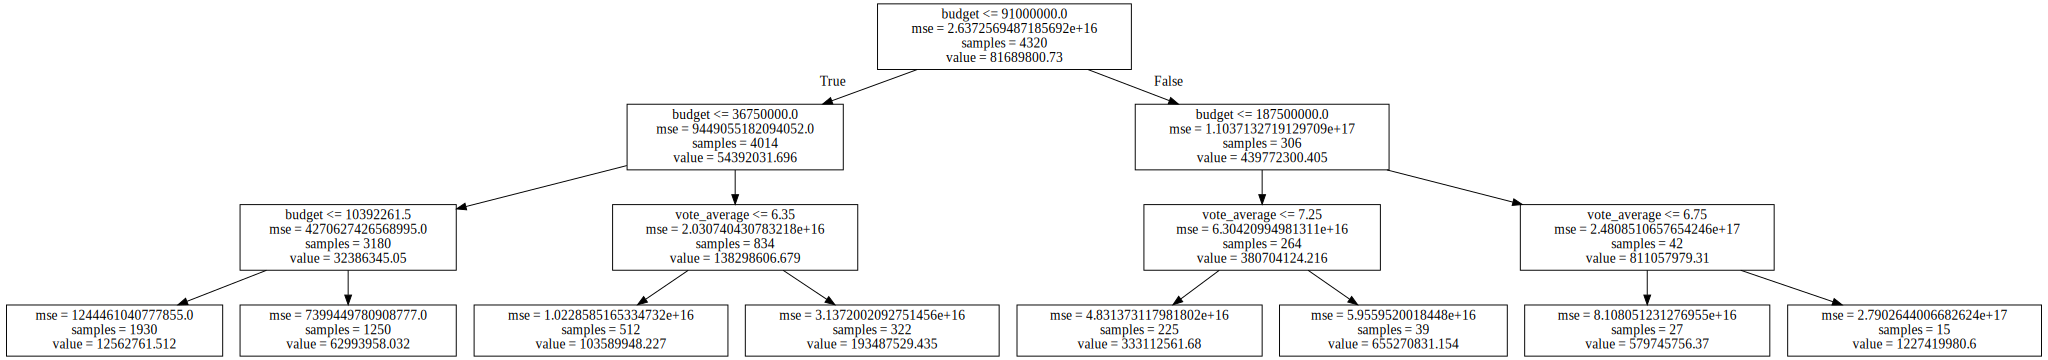

In [ ]:
display(graphviz.Source(tree.export_graphviz(model, feature_names=final_movie_db.columns)))

###Random Forest
*Trying the random forest model on our data with cross-validation*

0  trees finished.
1  trees finished.
2  trees finished.
3  trees finished.
4  trees finished.
5  trees finished.
6  trees finished.
7  trees finished.
8  trees finished.
9  trees finished.
10  trees finished.
11  trees finished.
12  trees finished.
13  trees finished.
14  trees finished.
15  trees finished.
16  trees finished.
17  trees finished.
18  trees finished.
19  trees finished.
20  trees finished.
21  trees finished.
22  trees finished.
23  trees finished.
24  trees finished.
25  trees finished.
26  trees finished.
27  trees finished.
28  trees finished.
29  trees finished.
30  trees finished.
31  trees finished.
32  trees finished.
33  trees finished.
34  trees finished.
35  trees finished.
36  trees finished.
37  trees finished.
38  trees finished.
39  trees finished.


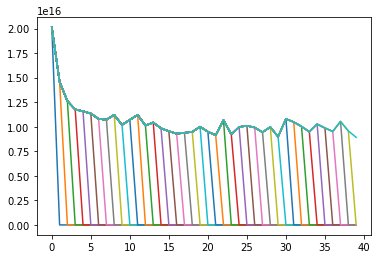

In [ ]:
numTrees = 40

mse_all = np.zeros(numTrees)

for outIdx in range(0,numTrees):

  numLoops   = 25
  mse_inside = np.zeros(numLoops)

  for inIdx in range(0,numLoops):

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
    rfModel = RandomForestRegressor(n_estimators=(outIdx+1), random_state=0)
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    mse_inside[inIdx] = mean_squared_error(y_test, y_pred_rf)

  print(outIdx,' trees finished.')
  mse_all[outIdx] = mse_inside.mean()

  plt.plot(mse_all)

###XGboost
*Finally, we will use XGBoost and measure feature importance*

In [ ]:
numLoops = 1000
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  if (idx % 50 == 0): print(idx)
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)
  xgbr = xgb.XGBRegressor(verbosity=0)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)

mse_xgb.mean()

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


7747715783715516.0

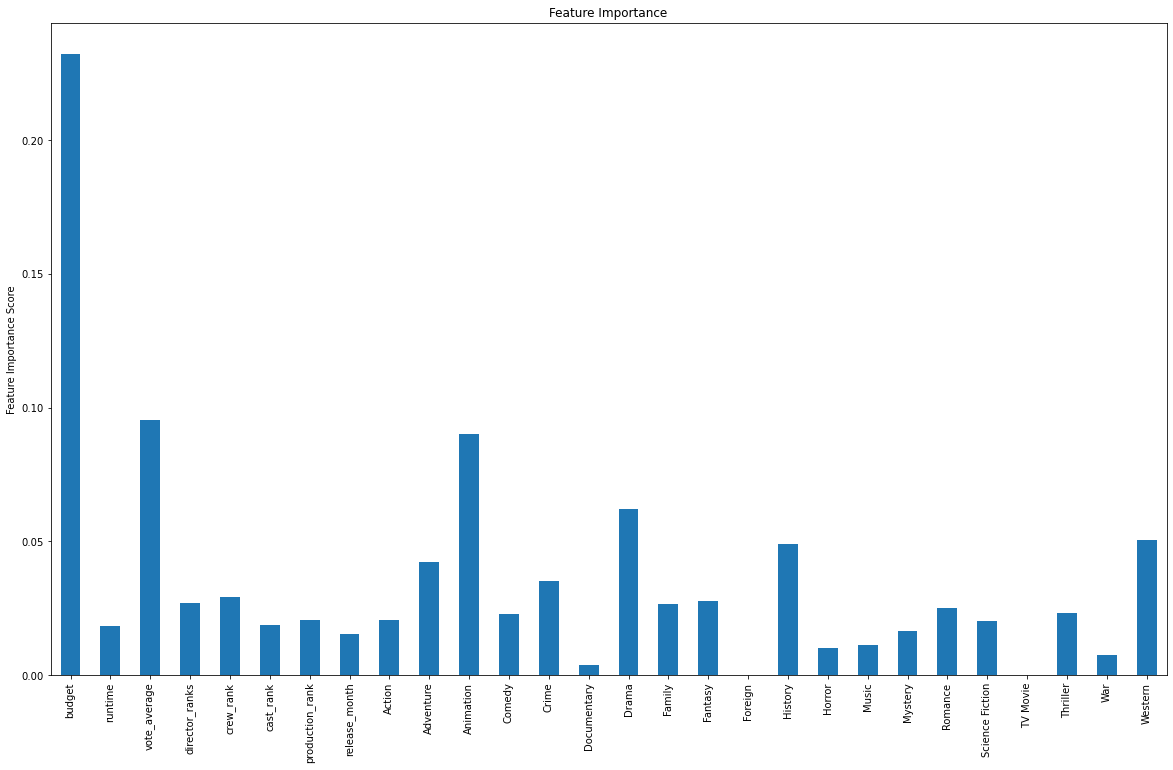

In [ ]:
plt.figure(figsize=(20,12))

feat_imp = pd.Series(xgbr.feature_importances_, index=final_movie_db.columns)
feat_imp.plot(kind='bar', title='Feature Importance')

plt.ylabel('Feature Importance Score');

##Conclusions

- The models' outputs are not useful for predicting exact amounts of revenue
- This is because of intangible data. The 'je ne seis quoi' of art, how well it is recieved, and the timing (socially speaking) of release are difficult to quantify.
- While we can't predict the revenue with any accuracy, we can still get actionable intel from the decision tree and feature importance metrics.
- The decision trees tend to favor the features 'budget' and 'vote_average'. I chose to include the voting average because it is a good metric that could be attained for instance, in a premier showing. However I assumed popularity would only be known after full release and was therefore not included.
- The feature importance metric overwhelmingly favors high budget animations (with a healthy vote average). This indicates to me that making high production-value movies for children is a winner. This seems quite reasonable considering that youth are shown across the board to consume more media than adults. In this case the adults have to buy a ticket as well to accompany the children to the theatre. Win win.
- Drama, history, and adventure genres are also influential for high grossing films.